In [33]:
import numpy as np
import pandas as pd

from sklearn.linear_model import LinearRegression,SGDRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor,GradientBoostingRegressor,AdaBoostRegressor
from sklearn.neighbors import KNeighborsRegressor
from sklearn.neural_network import MLPRegressor
import matplotlib.pyplot as plt
%matplotlib inline

from IPython.display import display

In [34]:
raw_data=pd.read_excel('kiosk-coefficients-rajput.xlsx',sheet_name='kiosk-consolidation').T
raw_data.reset_index(drop=True,inplace=True)
raw_data.dropna(inplace=True,axis=1)
raw_data.head(3)

,1,2,3,4,5,6,7,8,9,10,...,72,73,74,75,76,77,78,79,80,BG Value
0,86,520,456,478,497,509,513,472,434,474,...,519,529,488,484,490,508,596,487,476,204
1,90,213,186,173,177,196,225,339,229,218,...,229,205,208,204,201,208,203,197,200,198
2,82,644,643,608,627,603,595,603,612,615,...,615,613,608,610,607,604,615,615,612,256


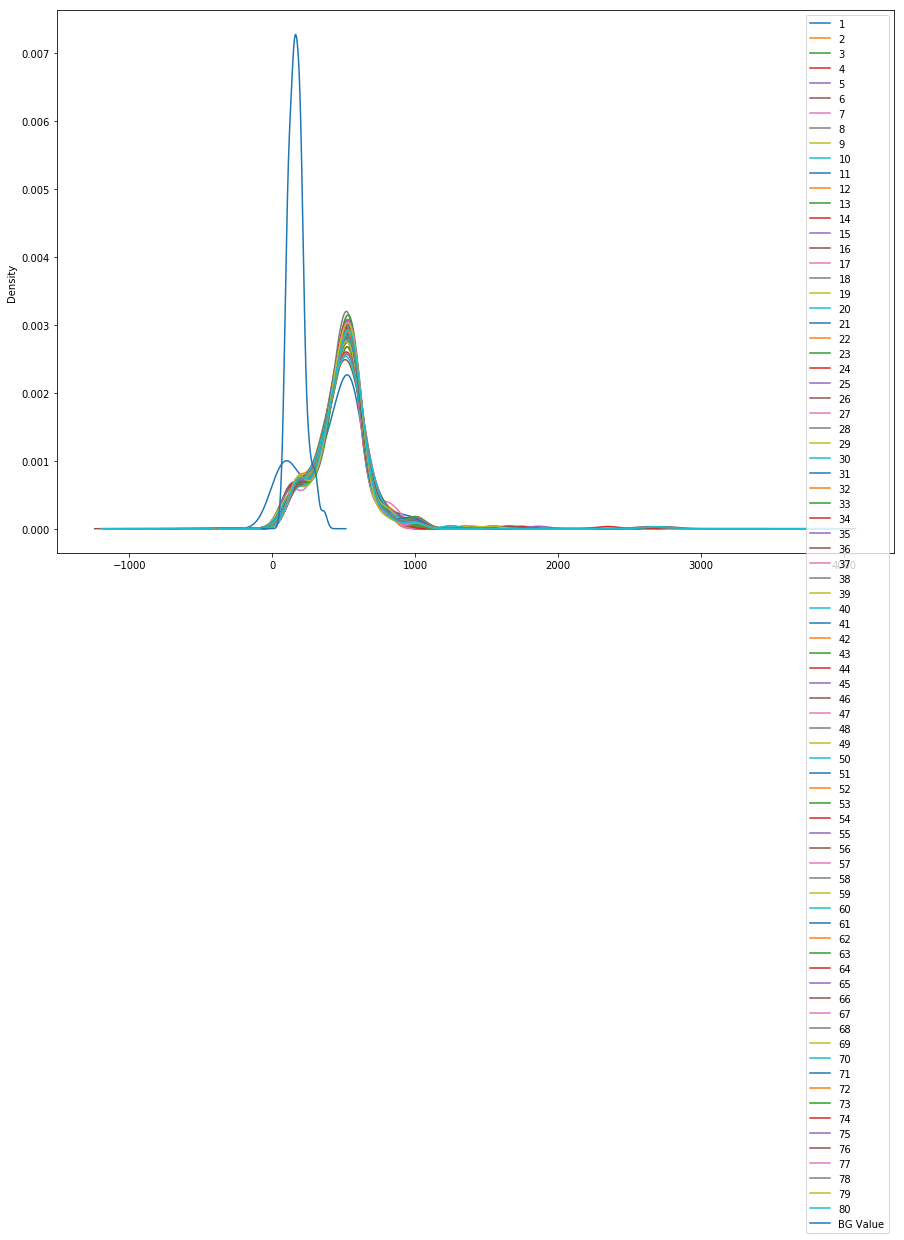

In [35]:
raw_data.plot(kind='kde',figsize=(15,10));

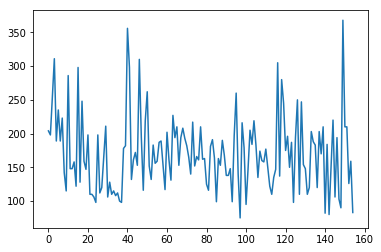

In [36]:
raw_data['BG Value'].plot()

In [37]:
from sklearn.preprocessing import Normalizer,StandardScaler,MinMaxScaler
def scale_numerical_data(data,scale=False):
        scaler=MinMaxScaler()
        #scaler=Normalizer()
        #scaler=StandardScaler()
        columns_to_encode=list(data.select_dtypes(include=['float64','int64','object']))
        #print(columns_to_encode)
        features_transform = pd.DataFrame(data = data)
        features_transform[columns_to_encode] = scaler.fit_transform(data[columns_to_encode])
        return features_transform
#data=raw_data.copy()

In [38]:
from sklearn.model_selection import train_test_split
#raw_data=data.copy()
#raw_data=scale_numerical_data(raw_data)
#display(raw_data)
X,y=raw_data.drop(['BG Value'],axis=1),raw_data['BG Value']
#display(X)
X=scale_numerical_data(X)
x_train,x_test,y_train,y_test=train_test_split(X,y,test_size=0.1,random_state=42)

In [39]:
from sklearn.metrics import  accuracy_score,r2_score,mean_squared_error,mean_absolute_error,explained_variance_score
from statsmodels.tools.eval_measures import rmse
def acc_score(y_pred,y_true,show_res=True):

    RMSE=rmse(y_true,y_pred)
    MAE=mean_absolute_error(y_true,y_pred)
    R2=r2_score(y_true,y_pred)
    MAPE=np.mean(np.abs((y_true-y_pred)/y_true))*100
    if show_res==True:
        print(' ERROR MEASURES ')
        print('Root Mean Squared Error: ', RMSE)
        print('Mean Absolute Error: ', MAE)
        print('Mean Absolute Percent Error: ', MAPE)
        print('R2 score: ', R2)
    
    return RMSE,MAE,R2,MAPE

In [40]:
def feature_plot(imp_features,X):
    indices = np.argsort(imp_features)[::-1]
    num_features=len(imp_features[imp_features>0])
    columns = X.columns.values[indices][:num_features]
    values=imp_features[indices][:num_features]

    plt.figure(figsize = (15,5))
    plt.title("Feature importances")
    plt.barh(range(num_features), values, align="center")
    plt.yticks(range(num_features), columns)
    plt.ylim([ num_features,-1])
    plt.show() 
    
def plot_test_data(y_test,y_pred):
    pred_data=y_test.copy()
    pred_data=pred_data.to_frame()
    pred_data['pred']=y_pred
    pred_data.plot(kind='line',use_index=False)
    pred_data.plot(kind='bar',use_index=True)
    plt.show();
    display(pred_data)
    
def get_reg_results(X_train,y_train,X_test,y_test,clf_models,print_var_imp):
    imp_features=None
    for clf in clf_models:
        model_name=clf.__class__.__name__
        print('classifier: ',model_name)
        clf.fit(X_train,y_train)
        pred=clf.predict(X_test)
        
        clf_metrics=acc_score(y_test,pred)
        plot_test_data(y_test,pred)
        if print_var_imp:
            try:
                imp_features=clf.feature_importances_
                feature_plot(imp_features,X_train)  
            except AttributeError:
                pass
    return imp_features


def get_model_prediction(X_train,y_train,X_test,y_test,clf_models,print_metrics=False,print_var_imp=False):
    imp_features=None
    for clf in clf_models:
        model_name=clf.__class__.__name__
        print('**Model name: ',model_name)
        clf.fit(X_train,y_train)
        pred=clf.predict(X_test)
        print(pred)
        
        if print_metrics:
            clf_metrics=acc_score(y_test,pred)
            plot_test_data(y_test,pred)
        if print_var_imp:
            try:
                imp_features=clf.feature_importances_
                feature_plot(imp_features,X_train)  
            except AttributeError:
                pass
    return imp_features

random_state=42

**Model name:  LinearRegression
[ 143.55168514  178.93023699 -221.40897355  240.42737138 1578.33805649
  175.34608587  148.10193453  113.87658002  113.55310622  195.88452859
  181.01697714  311.60480089  155.6052278   182.11626631  165.82375384
  296.51636632]
 ERROR MEASURES 
Root Mean Squared Error:  343.4397188423859
Mean Absolute Error:  152.66728415415088
Mean Absolute Percent Error:  40.40762623957218
R2 score:  0.09721393698220482


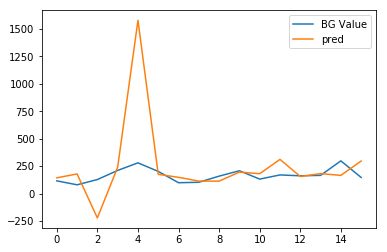

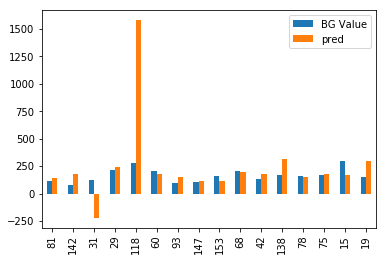

,BG Value,pred
81,116,143.551685
142,80,178.930237
31,128,-221.408974
29,211,240.427371
118,280,1578.338056
60,202,175.346086
93,99,148.101935
147,103,113.876580
153,159,113.553106
68,208,195.884529


**Model name:  RandomForestRegressor
[137.6 166.2 203.7 171.6 141.8 184.5 172.  193.5 138.4 182.7 219.2 177.2
 178.6 156.2 147.6 144.1]
 ERROR MEASURES 
Root Mean Squared Error:  70.63324730606685
Mean Absolute Error:  53.881249999999994
Mean Absolute Percent Error:  32.24365295115967
R2 score:  -8.038283040889656


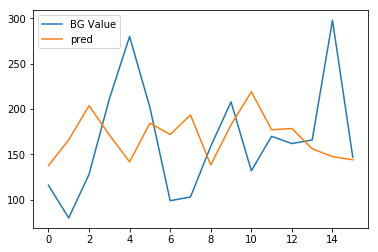

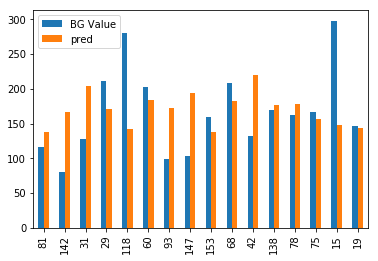

,BG Value,pred
81,116,137.6
142,80,166.2
31,128,203.7
29,211,171.6
118,280,141.8
60,202,184.5
93,99,172.0
147,103,193.5
153,159,138.4
68,208,182.7


**Model name:  GradientBoostingRegressor
[163.88233821 159.7172968  175.13418837 193.84861975 116.44714667
 173.37927348 200.09420384 188.75644121 139.28229383 190.56749413
 166.52555716 160.66082994 183.51801183 158.11924535 146.58713097
 144.2846657 ]
 ERROR MEASURES 
Root Mean Squared Error:  71.47400306386284
Mean Absolute Error:  52.21570860011989
Mean Absolute Percent Error:  33.72119924139702
R2 score:  -9.677137228603048


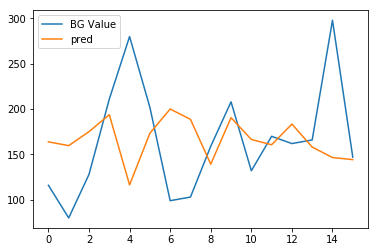

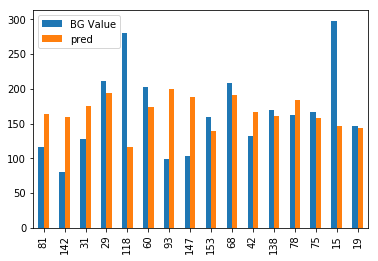

,BG Value,pred
81,116,163.882338
142,80,159.717297
31,128,175.134188
29,211,193.848620
118,280,116.447147
60,202,173.379273
93,99,200.094204
147,103,188.756441
153,159,139.282294
68,208,190.567494


**Model name:  SGDRegressor
[140.66761488 195.85800162 191.50116605 219.89778499 173.24365679
 164.58591226 189.89683535  71.77740664 116.24343449 170.64752689
 197.53164081 174.79177563 175.20509879 149.47552809 188.5914756
 133.04599642]
 ERROR MEASURES 
Root Mean Squared Error:  61.405421510324686
Mean Absolute Error:  48.9211863087187
Mean Absolute Percent Error:  29.45605800562997
R2 score:  -1.9993521947445099


C:\Users\ndrs\Anaconda3\lib\site-packages\sklearn\linear_model\stochastic_gradient.py:128: FutureWarning: max_iter and tol parameters have been added in <class 'sklearn.linear_model.stochastic_gradient.SGDRegressor'> in 0.19. If both are left unset, they default to max_iter=5 and tol=None. If tol is not None, max_iter defaults to max_iter=1000. From 0.21, default max_iter will be 1000, and default tol will be 1e-3.
  "and default tol will be 1e-3." % type(self), FutureWarning)


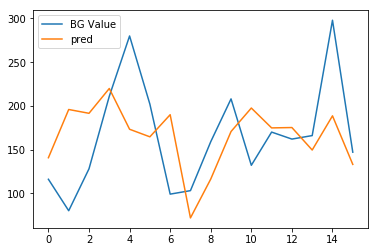

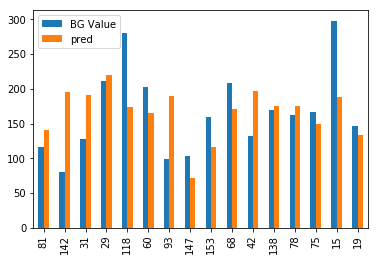

,BG Value,pred
81,116,140.667615
142,80,195.858002
31,128,191.501166
29,211,219.897785
118,280,173.243657
60,202,164.585912
93,99,189.896835
147,103,71.777407
153,159,116.243434
68,208,170.647527


**Model name:  KNeighborsRegressor
[150.4 178.0 148.8 197.0 173.6 170.4 191.2 177.2 150.2 187.6 182.6 180.4
 180.4 180.8 205.0 147.6]
 ERROR MEASURES 
Root Mean Squared Error:  55.963760595585434
Mean Absolute Error:  43.03750000000001
Mean Absolute Percent Error:  23.956906511816985
R2 score:  -9.778453881213718


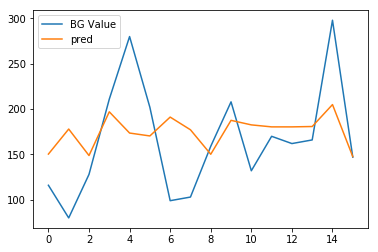

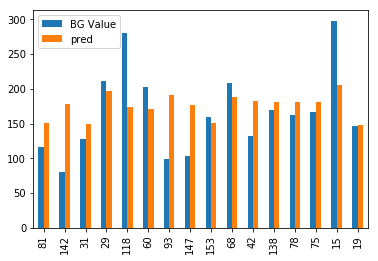

,BG Value,pred
81,116,150.4
142,80,178
31,128,148.8
29,211,197
118,280,173.6
60,202,170.4
93,99,191.2
147,103,177.2
153,159,150.2
68,208,187.6


**Model name:  AdaBoostRegressor
[154.50847458 171.52631579 165.2        178.06666667 172.14285714
 172.32051282 171.13461538 166.01818182 157.75925926 176.90816327
 176.90816327 171.52631579 176.90816327 156.48484848 174.42592593
 160.28571429]
 ERROR MEASURES 
Root Mean Squared Error:  57.426208458144565
Mean Absolute Error:  44.55673191306036
Mean Absolute Percent Error:  26.09773059342016
R2 score:  -55.76484661230227


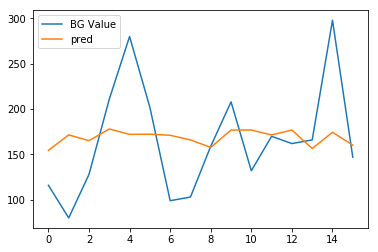

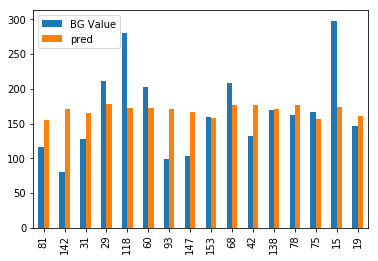

,BG Value,pred
81,116,154.508475
142,80,171.526316
31,128,165.200000
29,211,178.066667
118,280,172.142857
60,202,172.320513
93,99,171.134615
147,103,166.018182
153,159,157.759259
68,208,176.908163


**Model name:  MLPRegressor
[104.540169   157.97741416 155.29001389 182.11963486 140.93576171
 127.67238461 152.39246878  37.30188227  80.81554781 133.52879721
 159.93330915 137.64536809 138.13456651 113.01005324 151.20589483
  97.39516941]
 ERROR MEASURES 
Root Mean Squared Error:  71.0165398206944
Mean Absolute Error:  60.26799852673795
Mean Absolute Percent Error:  54.21701822672409
R2 score:  -3.191093601799766


C:\Users\ndrs\Anaconda3\lib\site-packages\sklearn\neural_network\multilayer_perceptron.py:564: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


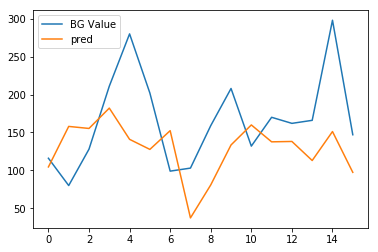

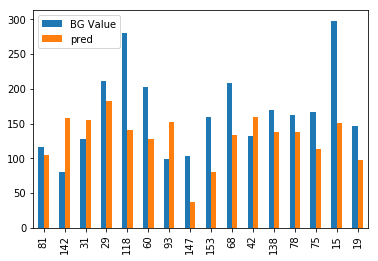

,BG Value,pred
81,116,104.540169
142,80,157.977414
31,128,155.290014
29,211,182.119635
118,280,140.935762
60,202,127.672385
93,99,152.392469
147,103,37.301882
153,159,80.815548
68,208,133.528797


In [41]:
clf_models=[LinearRegression(),
            RandomForestRegressor(random_state=random_state),
            GradientBoostingRegressor(random_state=random_state),
            SGDRegressor(random_state=random_state),
            KNeighborsRegressor(),
            AdaBoostRegressor(random_state=random_state),
            MLPRegressor()
    ]   
get_model_prediction(x_train,y_train,x_test,y_test,clf_models,True,False)

## Linear Coefficients

### Using 90% of data

 ERROR MEASURES 
Root Mean Squared Error:  343.4397188423859
Mean Absolute Error:  152.66728415415088
Mean Absolute Percent Error:  40.40762623957218
R2 score:  0.09721393698220482


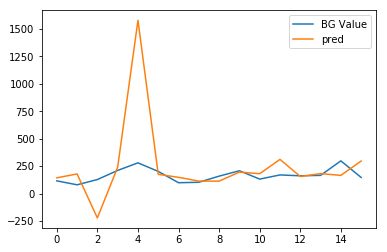

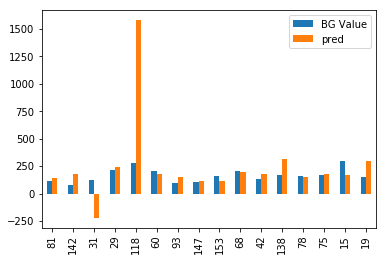

,BG Value,pred
81,116,143.551685
142,80,178.930237
31,128,-221.408974
29,211,240.427371
118,280,1578.338056
60,202,175.346086
93,99,148.101935
147,103,113.876580
153,159,113.553106
68,208,195.884529


the intercept of the linear model is 151.94736114675052
The coefficient for 1 is -48.34655386565833
The coefficient for 2 is -315.8608053114285
The coefficient for 3 is 508.2426201271831
The coefficient for 4 is -275.2785868941211
The coefficient for 5 is 66.11065381760142
The coefficient for 6 is 458.9488425195988
The coefficient for 7 is -351.1869804555491
The coefficient for 8 is -112.80906305648949
The coefficient for 9 is -195.77387102801737
The coefficient for 10 is 284.0451863522212
The coefficient for 11 is 98.97617368288716
The coefficient for 12 is -249.2730166320395
The coefficient for 13 is 860.3339207561384
The coefficient for 14 is 1.7942877037392009
The coefficient for 15 is 2.932966996957198
The coefficient for 16 is 33.27624227113051
The coefficient for 17 is -497.58802300785453
The coefficient for 18 is 553.3362255982139
The coefficient for 19 is 554.2646358854995
The coefficient for 20 is -827.7015532444555
The coefficient for 21 is -1265.0045152267717
The coefficien

In [42]:
model = LinearRegression()
model.fit(x_train, y_train)
pred=model.predict(x_test)
clf_metrics=acc_score(y_test,pred)
plot_test_data(y_test,pred)
intercept = model.intercept_
print('the intercept of the linear model is',intercept)
for idx, col_name in enumerate(x_train.columns):
    print("The coefficient for {} is {}".format(col_name, model.coef_[idx]))

### Using all the data

In [43]:
model = LinearRegression()
model.fit(X, y)
#pred=model.predict(x_test)
#clf_metrics=acc_score(y_test,pred)
#plot_test_data(y_test,pred)
intercept = model.intercept_
print('the intercept of the linear model is',intercept)
for idx, col_name in enumerate(x_train.columns):
    print("The coefficient for {} is {}".format(col_name, model.coef_[idx]))

the intercept of the linear model is 154.1611191989694
The coefficient for 1 is -93.91369546328775
The coefficient for 2 is -65.68931851427911
The coefficient for 3 is 481.79263184888475
The coefficient for 4 is -437.1526406193468
The coefficient for 5 is 45.50105725823137
The coefficient for 6 is 431.5125036261255
The coefficient for 7 is -186.08117510394374
The coefficient for 8 is -363.2863944177577
The coefficient for 9 is -185.8734364654025
The coefficient for 10 is 272.9426744391722
The coefficient for 11 is 325.8670895891133
The coefficient for 12 is -311.1953985789031
The coefficient for 13 is 850.9297758009488
The coefficient for 14 is -60.2136561996497
The coefficient for 15 is -29.85038578980636
The coefficient for 16 is 148.05784717045037
The coefficient for 17 is -377.53054361513546
The coefficient for 18 is 376.1462600219435
The coefficient for 19 is 294.63711661699443
The coefficient for 20 is -168.70081286961613
The coefficient for 21 is -733.9600967325113
The coefficie

## Model Predictions

In [53]:
new_data=pd.read_excel('STANDARDS-WEARABLE-NATRAJ PREDICTION.xlsx',sheet_name='PREDICTION-DETAILS',header=None,
                      usecols="G", na_values=['Orig ADC']).dropna().T
y_test=new_data[0]
x_test=new_data.drop([0],axis=1)

In [52]:
clf_models=[LinearRegression(),
            RandomForestRegressor(random_state=random_state),
            GradientBoostingRegressor(random_state=random_state),
            SGDRegressor(random_state=random_state),
            KNeighborsRegressor(),
            AdaBoostRegressor(random_state=random_state),
            MLPRegressor()
    ]

x_test=scale_numerical_data(x_test)
get_model_prediction(X,y,x_test,None,clf_models)
print('Actual Glucose Level',y_test)

**Model name:  LinearRegression
[154.1611192]
**Model name:  RandomForestRegressor
[145.4]
**Model name:  GradientBoostingRegressor
[165.51280462]
**Model name:  SGDRegressor
[36.50543282]
**Model name:  KNeighborsRegressor
[137.0]
**Model name:  AdaBoostRegressor


C:\Users\ndrs\Anaconda3\lib\site-packages\sklearn\linear_model\stochastic_gradient.py:128: FutureWarning: max_iter and tol parameters have been added in <class 'sklearn.linear_model.stochastic_gradient.SGDRegressor'> in 0.19. If both are left unset, they default to max_iter=5 and tol=None. If tol is not None, max_iter defaults to max_iter=1000. From 0.21, default max_iter will be 1000, and default tol will be 1e-3.
  "and default tol will be 1e-3." % type(self), FutureWarning)


[133.66666667]
**Model name:  MLPRegressor
[3.55839193]
Actual Glucose Level 0    442.0
Name: 0, dtype: float64


C:\Users\ndrs\Anaconda3\lib\site-packages\sklearn\neural_network\multilayer_perceptron.py:564: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)
